# What is TimeSeries

A series of data points collected in time order is known as a time series. Most of business houses work on time series data to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.

Not every data collected with respect to time represents a time series.

## Components of a Time Series

### Trend 

Trend : Trend is a general direction in which something is developing or changing.

### Seasonality

Seasonality : The pattern is repeating at regular time interval which is known as the seasonality. 
                Any predictable change or pattern in a time series that recurs or repeats over a specific time period 
                can be said to be seasonality.

### Difference between a time series and regression problem

The main difference is that a time series is time dependent. So the basic assumption of a linear regression model 
that the observations are independent doesn’t hold in this case.
Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. 
variations specific to a particular time frame.
So, predicting a time series using regression techniques is not a good approach.


Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics 
and other characteristics of the data. Time series forecasting is the use of a model to predict future values 
based on previously observed values.

### Decompose Multiplicative

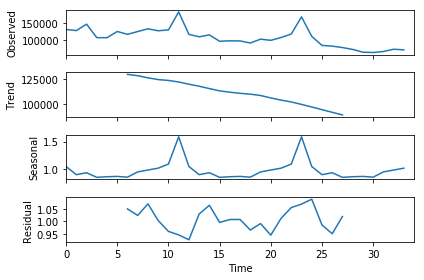

In [24]:
import statsmodels.api as sm
# Decompose

res = sm.tsa.seasonal_decompose(ts.values, freq=12, model = 'multiplicative')
fig = res.plot()

### Decompose Additive

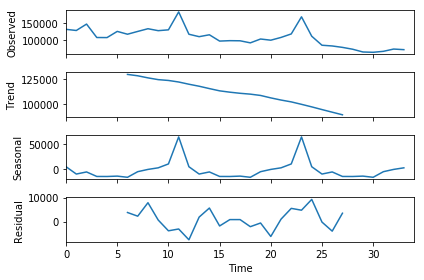

In [25]:
res = sm.tsa.seasonal_decompose(ts.values,freq=12, model='additive')
fig = res.plot()

Formula For Multiplicative timeseries:
    

yt=St x Tt x Et [Stationary, Trend, Error or Residual]

Stationarity refers to time-invariance of a series. (ie) Two points in a time series are related to each other by only how far apart they are, and not by the direction(forward/backward)


When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary.


There are multiple tests that can be used to check stationarity.


ADF( Augmented Dicky Fuller Test)
KPSS
PP (Phillips-Perron test)

# Problem Statement 

### Analytics Vidhya Mini Project

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. 
JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, 
if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, 
you need to forecast the traffic on JetRail for the next 7 months. You are provided with 
traffic data of JetRail since inception in the test file.

Table of Contents:
    
    
a) Understanding Data:


1) Hypothesis Generation
2) Getting the system ready and loading the data
3) Dataset Structure and Content
4) Feature Extraction
5) Exploratory Analysis


b) Forecasting using Multiple Modeling Techniques:


1) Splitting the data into training and validation part
2) Modeling techniques
3) Holt’s Linear Trend Model on daily time series
4) Holt Winter’s Model on daily time series
5) Introduction to ARIMA model
6) Parameter tuning for ARIMA model
7) SARIMAX model on daily time series

### Hypothesis Generation

We will start with the first step, i.e. Hypothesis Generation. Hypothesis Generation is the process of listing out 
all the possible factors that can affect the outcome.


Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.


Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

- There will be an increase in the traffic as the years pass by.
- Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, - generally companies expand their businesses over time leading to more customers travelling through JetRail.


- The traffic will be high from May to October.
- Explanation - Tourist visits generally increases during this time perion.


- Traffic on weekdays will be more as compared to weekends/holidays.
- Explanation - People will go to office on weekdays and hence the traffic will be more


- Traffic during the peak hours will be high.
- Explanation - People will travel to work, college.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('C:\\Code Templates Python\\Time Series\\Train.csv')
test = pd.read_csv('C:\\Code Templates Python\\Time Series\\Test.csv')
train.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

ID is the unique number given to each observation point.


Datetime is the time of each observation.


Count is the passenger count corresponding to each Datetime.

In [5]:
train.dtypes, test.dtypes


(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

## Feature Extraction

In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

train_original = train.copy()
test_original = test.copy()

test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [9]:
train.head(), train_original.head()

(   ID            Datetime  Count  year  month  day  Hour
 0   0 2012-08-25 00:00:00      8  2012      8   25     0
 1   1 2012-08-25 01:00:00      2  2012      8   25     1
 2   2 2012-08-25 02:00:00      6  2012      8   25     2
 3   3 2012-08-25 03:00:00      2  2012      8   25     3
 4   4 2012-08-25 04:00:00      2  2012      8   25     4,
    ID            Datetime  Count  year  month  day  Hour
 0   0 2012-08-25 00:00:00      8  2012      8   25     0
 1   1 2012-08-25 01:00:00      2  2012      8   25     1
 2   2 2012-08-25 02:00:00      6  2012      8   25     2
 3   3 2012-08-25 03:00:00      2  2012      8   25     3
 4   4 2012-08-25 04:00:00      2  2012      8   25     4)

- We made a hypothesis for the traffic pattern on weekday and weekend as well. , 
- So, let’s make a weekend variable to visualize the impact of weekend on traffic.

- We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

- Values of 5 and 6 represents that the days are weekend.

In [10]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [11]:
# Let’s assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

In [12]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


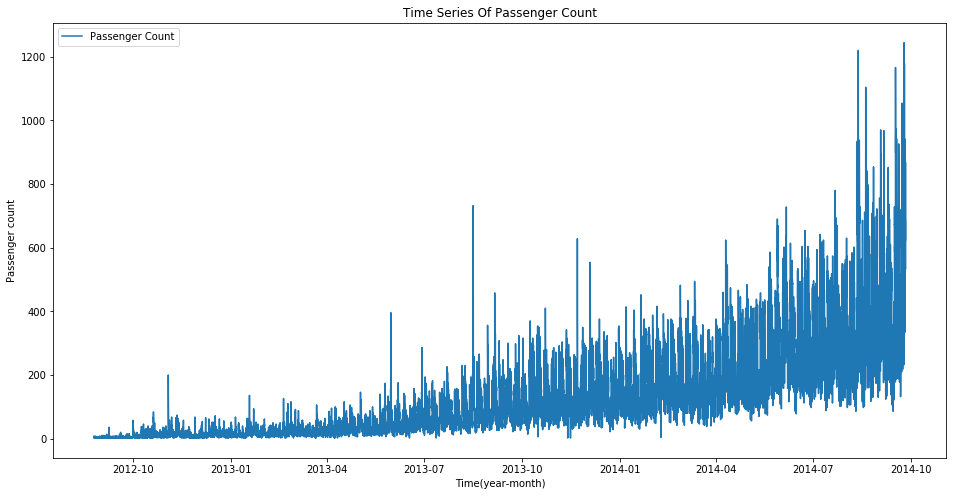

In [13]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis.
df = train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']

plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series Of Passenger Count')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

- Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time.
- We can also see that at certain points there is a sudden increase in the number of counts. 
- The possible reason behind this could be that on particular day, due to some event the traffic was high.

- We will work on the train file for all the analysis and will use the test file for forecasting.

#### Lets recall the hypothesis that we made earlier:

- Traffic will increase as the years pass by
- Traffic will be high from May to October
- Traffic on weekdays will be more
- Traffic during the peak hours will be high

### Exploratory Analysis

Let us try to verify our hypothesis using the actual data.

Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

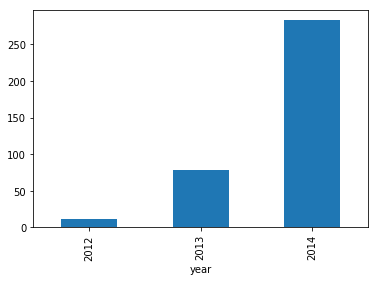

In [14]:
train.groupby('year')['Count'].mean().plot.bar()


- We see an exponential growth in the traffic with respect to year which validates our hypothesis.

-  Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

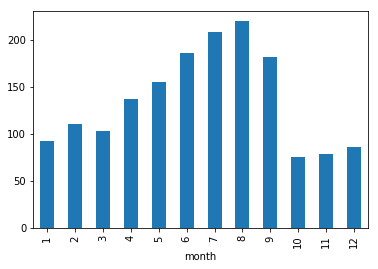

In [15]:
train.groupby('month')['Count'].mean().plot.bar()


- Here we see a decrease in the mean of passenger count in last three months. This does not look right. 
- Let’s look at the monthly mean of each year separately.

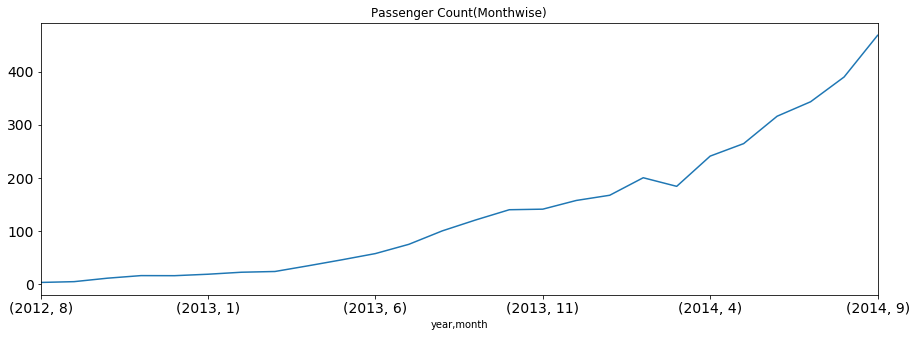

In [16]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

- We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
- Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

- In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

- Let’s look at the daily mean of passenger count.

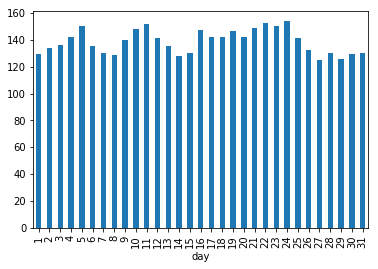

In [17]:
train.groupby('day')['Count'].mean().plot.bar()


- We are not getting much insights from day wise count of the passengers.


- We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

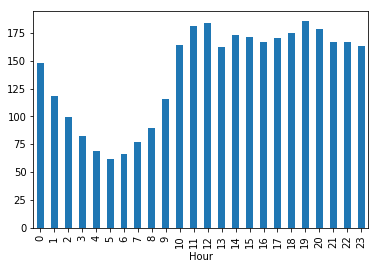

In [18]:
train.groupby('Hour')['Count'].mean().plot.bar()


- It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.

- After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

- Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

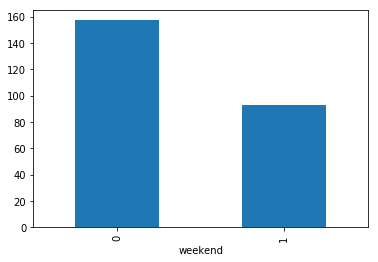

In [19]:
train.groupby('weekend')['Count'].mean().plot.bar()


- It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

- Now we will try to look at the day wise passenger count.


- Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

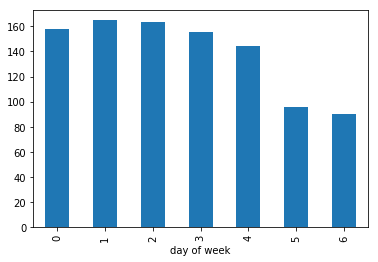

In [20]:
train.groupby('day of week')['Count'].mean().plot.bar()


- From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the 
other days of the week. Now we will look at basic modeling techniques. 
- Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [21]:
train=train.drop('ID',1)


- As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series 
to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence 
would be easier for a model to learn.

In [22]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Hourly time series
hourly = train.resample('H').mean()

# Converting to daily mean
daily = train.resample('D').mean()

# Converting to weekly mean
weekly = train.resample('W').mean()

# Converting to monthly mean
monthly = train.resample('M').mean()

- Let’s look at the hourly, daily, weekly and monthly time series.

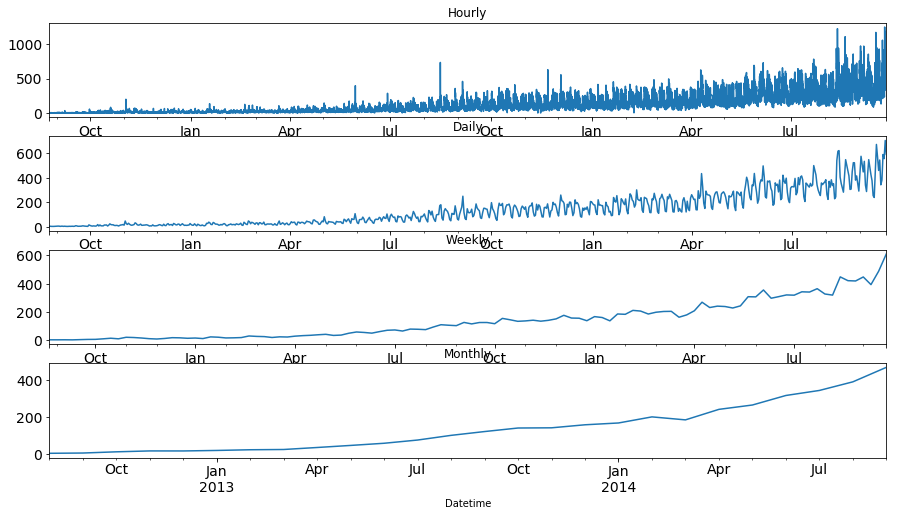

In [24]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

- We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.


- But it would be difficult to convert the monthly and weekly predictions to hourly predictions, 
as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions,
which will become very expanded process. So, we will work on the daily time series.

In [25]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

### Train Test Split

- To divide the data into training and validation set, we will take last 3 months as the validation data 
and rest for training data. We will take only 3 months as the trend will be the most in them. 
If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.


- If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

- Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. 
- It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.


- The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [26]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25'] 

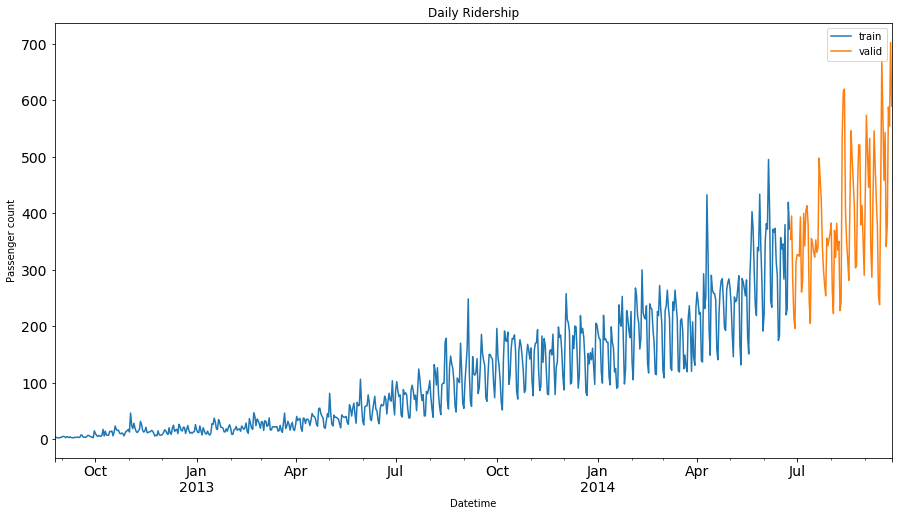

In [27]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## Model Building

- We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

i) Naive Approach


ii) Moving Average


iii) Simple Exponential Smoothing


iv) Holt’s Linear Trend Model


- We will discuss each of these methods in detail now.

### Naive Approach

- In this forecasting technique, we assume that the next expected point is equal to the last observed point. 
- So we can expect a straight horizontal line as the prediction. 

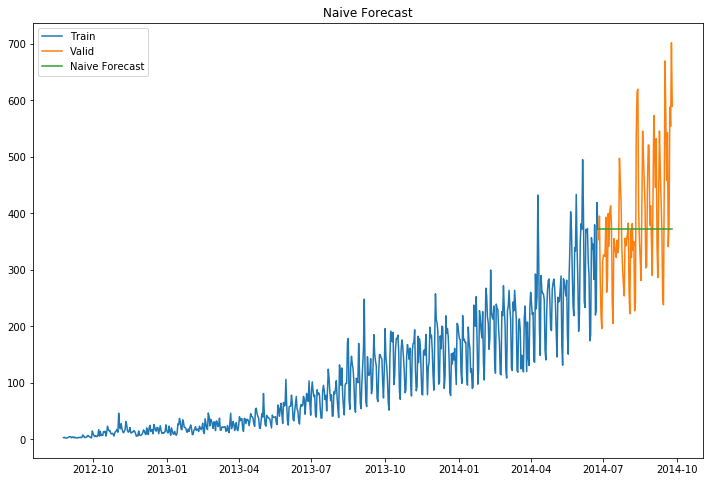

In [28]:
dd = np.asarray(Train.Count)    # Make Target variable as array.
y_hat = valid.copy()            # takeing a copy of validation data
y_hat['naive'] = dd[len(dd)-1]  # putting dd values into naive column

plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

- We can calculate how accurate our predictions are using rmse(Root Mean Square Error).


- rmse is the standard deviation of the residuals.


- Residuals are a measure of how far from the regression line data points are.

In [29]:
# We will now calculate RMSE to check the accuracy of our model on validation data set.

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


- We can infer that this method is not suitable for datasets with high variability. 
- We can reduce the rmse value by adopting different techniques.

### Moving Average

- In this technique we will take the average of the passenger counts for last few time periods only.

- Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

- Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

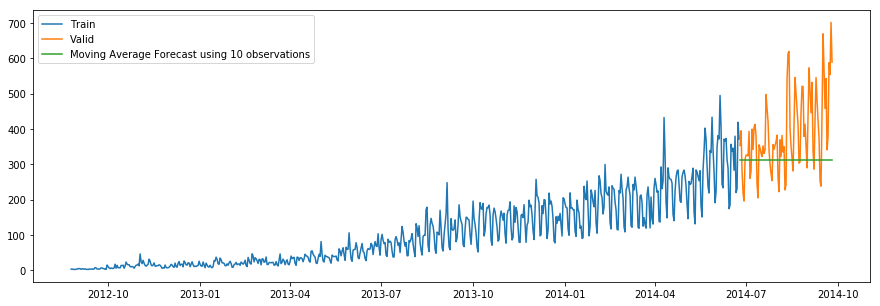

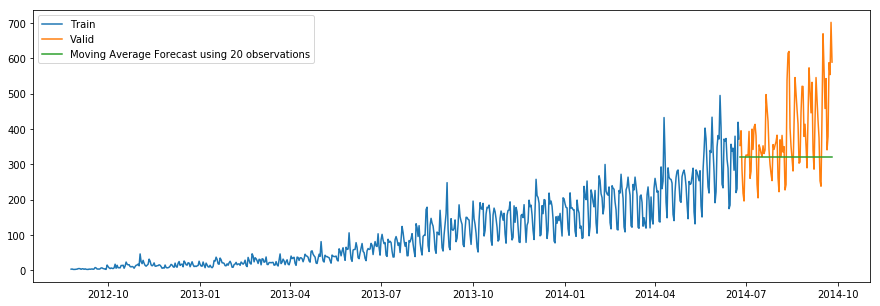

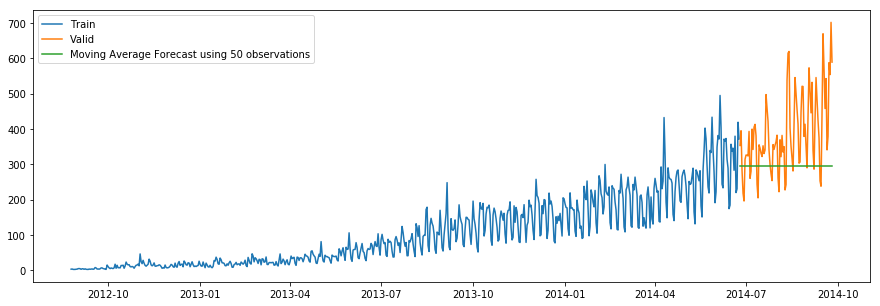

In [30]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

- We took the average of last 10, 20 and 50 observations and predicted based on that. 
- This value can be changed in the above code in .rolling().mean() part. 
- We can see that the predictions are getting weaker as we increase the number of observations.

In [31]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986802


### Simple Exponential Moving

- In this technique, we assign larger weights to more recent observations than to observations from the distant past.


- The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.


NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

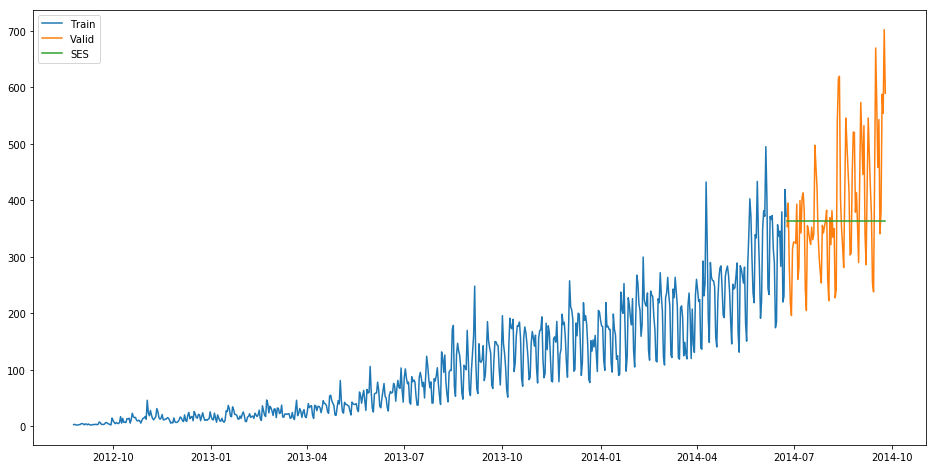

In [32]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


### Holt’s Linear Trend Model

- It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.


- First of all let us visualize the trend, seasonality and error in the series.

- We can decompose the time series in four parts.


- Observed, which is the original time series.
- Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

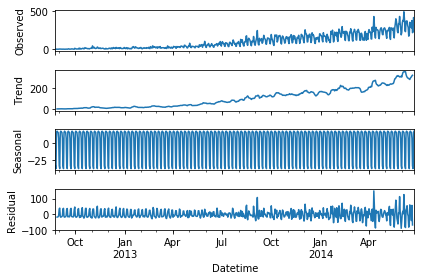

In [34]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

- An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

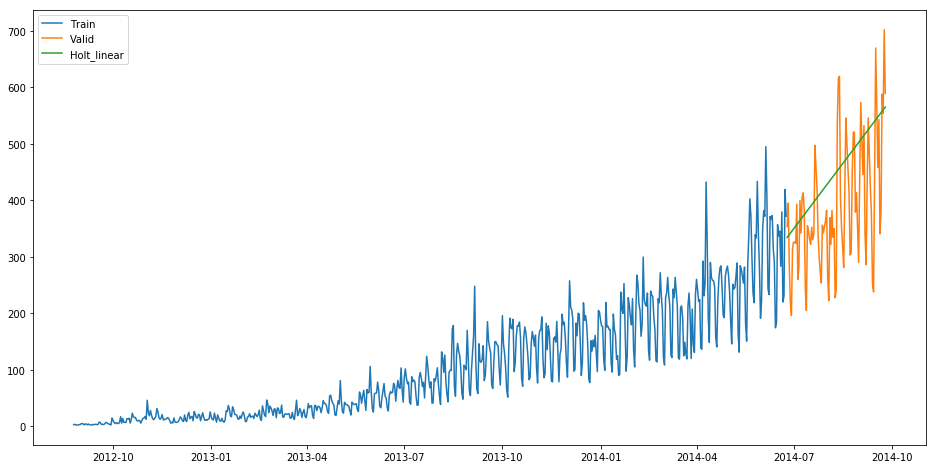

In [35]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

- We can see an inclined line here as the model has taken into consideration the trend of the time series.

- Let’s calculate the rmse of the model.

In [36]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


In [40]:
submission=pd.read_csv("C:\\Code Templates Python\\Time Series\\Sample_Submission.csv")
submission.head()

,ID,Count


In [41]:
predict = fit1.forecast(len(test))
test['prediction'] = predict

In [42]:
# Calculating the hourly ratio of count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

# Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

# Groupby to csv format
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('C:\\Code Templates Python\\Time Series\\GROUPby.csv')

temp2 = pd.read_csv("C:\\Code Templates Python\\Time Series\\GROUPby.csv")
temp2 = temp2.drop('Hour.1',1)

# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [43]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'], axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('C:\\Code Templates Python\\Holt linear.csv')

### Holt Winter's model on daily time series

- Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

- The above mentioned models don’t take into account the seasonality of the dataset while forecasting. 
- Hence we need a method that takes into account both trend and seasonality to forecast future prices.

- One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

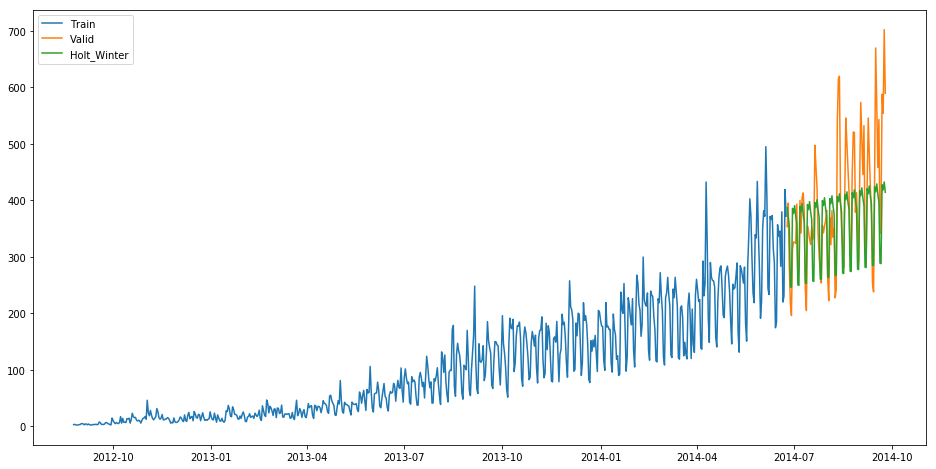

In [44]:
# Let’s first fit the model on training dataset and validate it using the validation dataset.

y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [45]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.37826583279276


- We can see that the rmse value has reduced a lot from this method. Let’s forecast the Counts for the entire length of the Test dataset.

In [46]:
predict=fit1.forecast(len(test))


In [47]:
test['prediction']=predict


- Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

In [ ]:
# Merge Test and test_original on day, month and year

merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [48]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('C:\\Code Templates Python\\Holt winters.csv')

- Holt winters model produced rmse of 328.356 on the leaderboard.
- The possible reason behind this may be that this model was not that good in predicting the trend of the time series 
but worked really well on the seasonality part.
- Till now we have made different models for trend and seasonality. 
Can’t we make a model which will consider both the trend and seasonality of the time series?


Yes we can. We will look at the "ARIMA" model for time series forecasting.

### ARIMA

- ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).


Here "p" is the order of the autoregressive model(number of time lags)
"d" is the degree of differencing(number of times the data have had past values subtracted)
"q" is the order of moving average model. We will discuss more about these parameters in next section.


- The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

#### What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- THe covariance of the ith term and the (i+m)th term should not be a function of time.

### Why do we have to make the time series stationary?
- We make the series stationary to make the variables independent. Variables can be dependent in 
various ways, but can only be independent in one way. So, we will get more information when they 
are independent. Hence the time series must be stationary.


- If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to 
remove the trend and seasonality from the data. 

### Parameter tuning for ARIMA model

- First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.

Stationarity Check:

- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.



The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.


We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).


Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

In [49]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = pd.rolling_std(timeseries, window=24)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [50]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

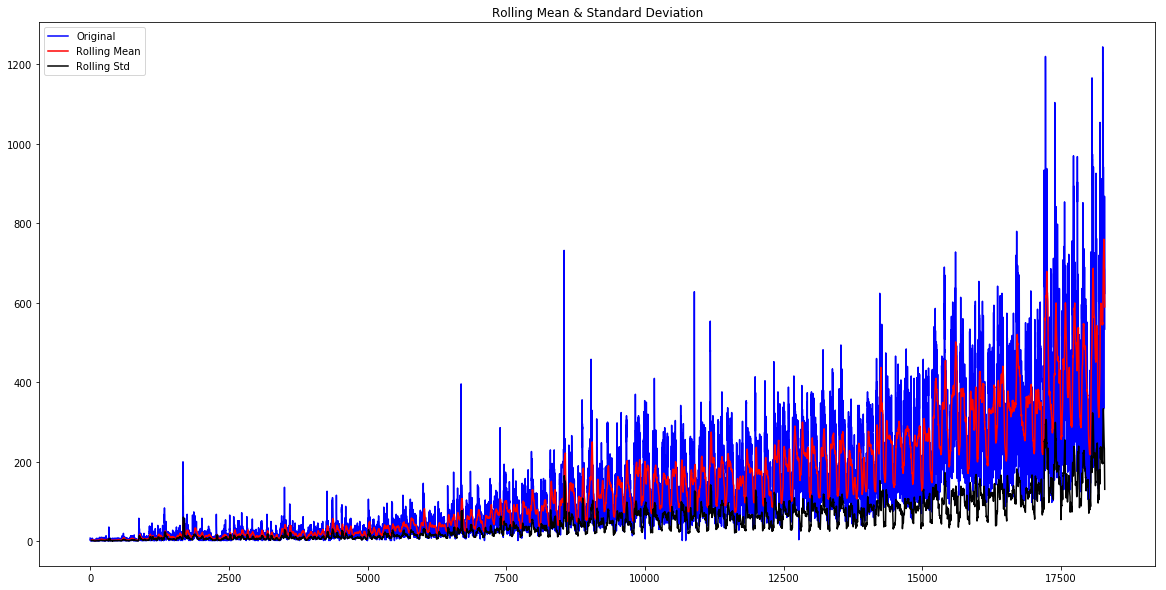

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [51]:
test_stationarity(train_original['Count'])


- The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend 
in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality 
from the data.

Removing Trend:
    
- We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, 
for example log transformation.

- We will take rolling average here to remove the trend. 
- We will take the window size of 24 based on the fact that each day has 24 hours.

In [52]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

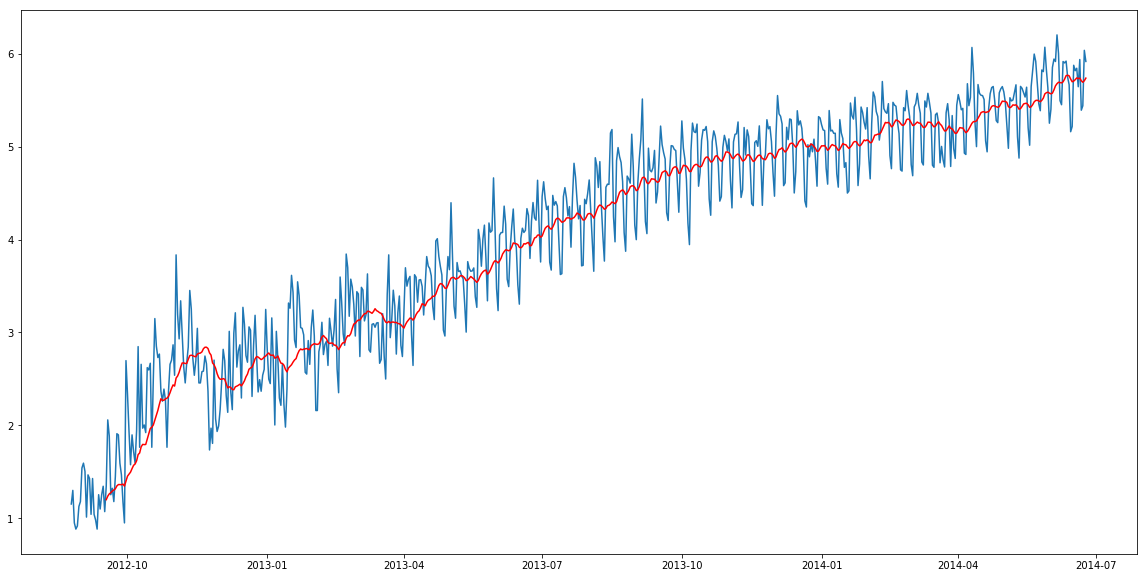

In [53]:
moving_avg = pd.rolling_mean(Train_log, 24)
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

- So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

In [54]:
train_log_moving_avg_diff = Train_log - moving_avg


- Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

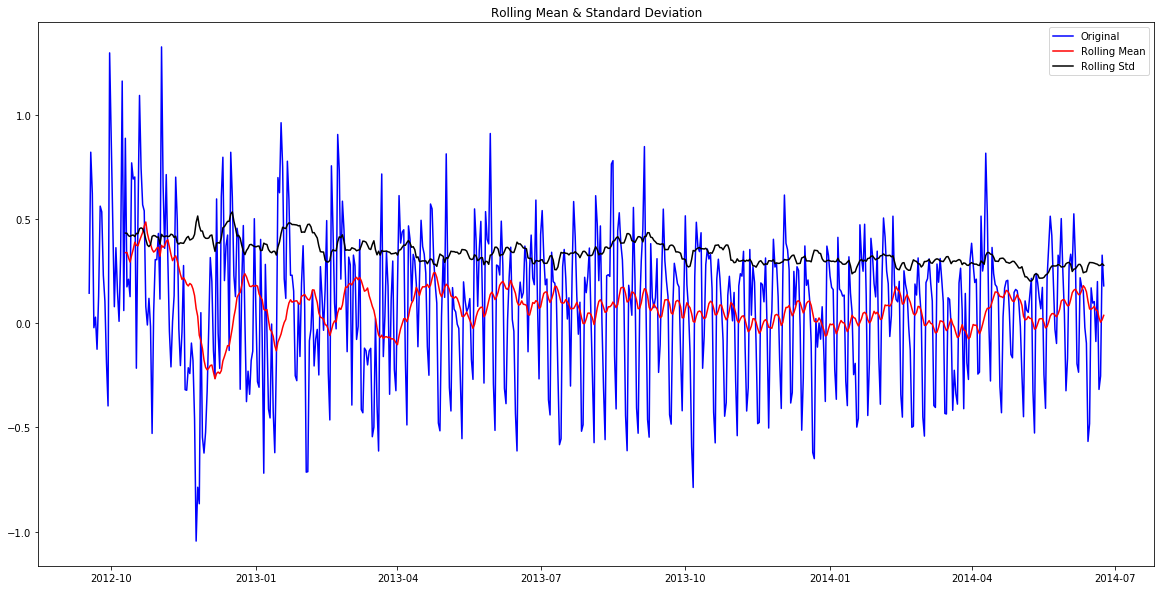

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [55]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

- We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

- Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

- Differencing can help to make the series stable and eliminate the trend.

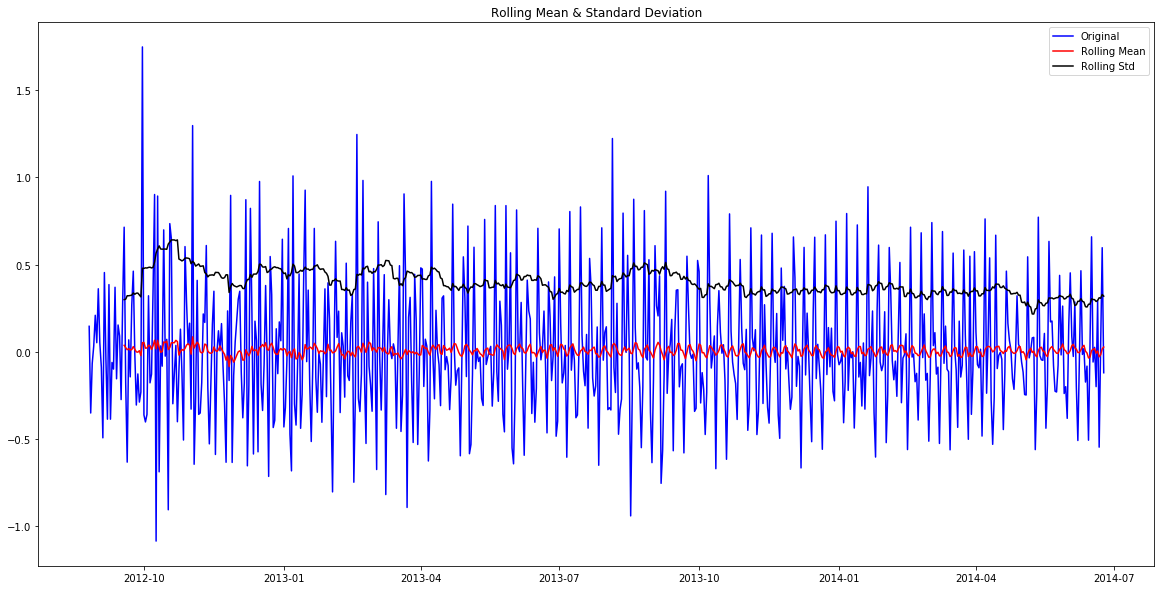

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [56]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.


Removing Seasonality:
    

- By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
- Seasonality is always of a fixed and known period.
- We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

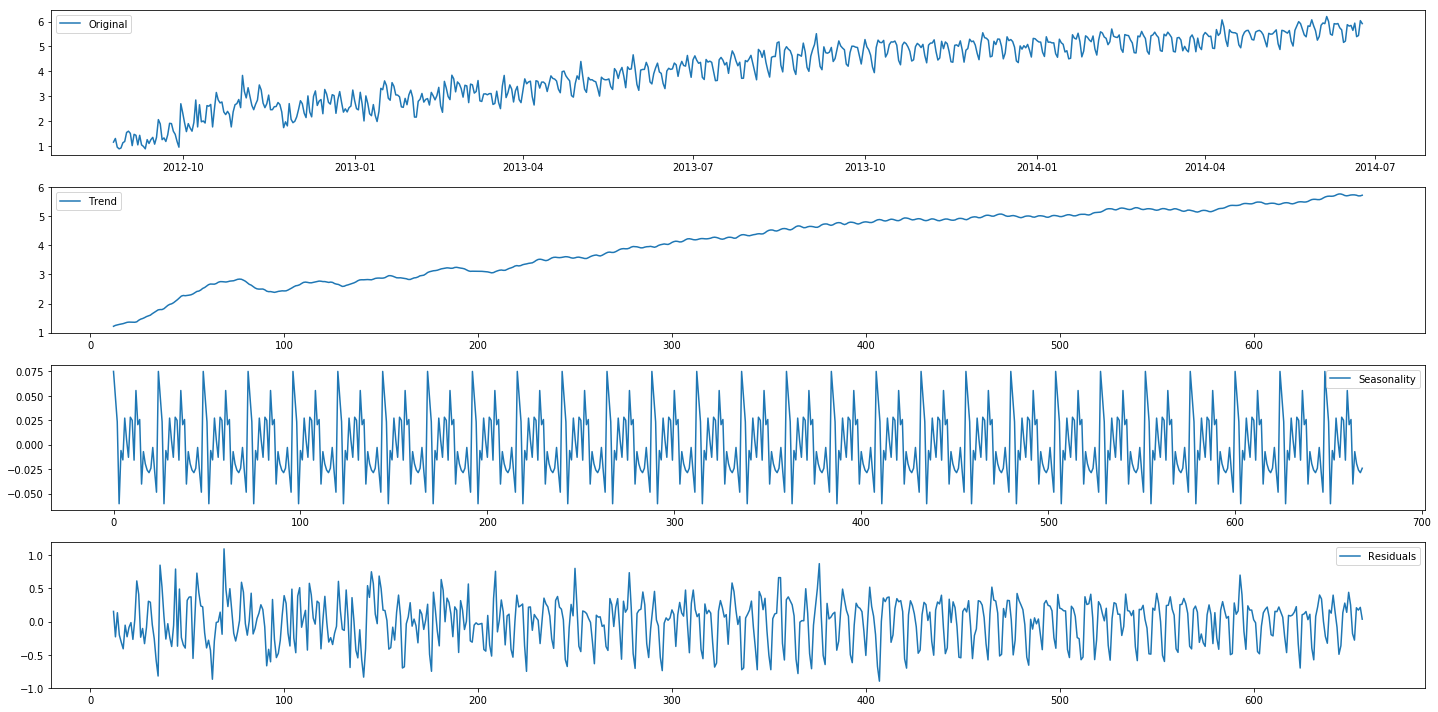

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.


- Let’s check stationarity of residuals.

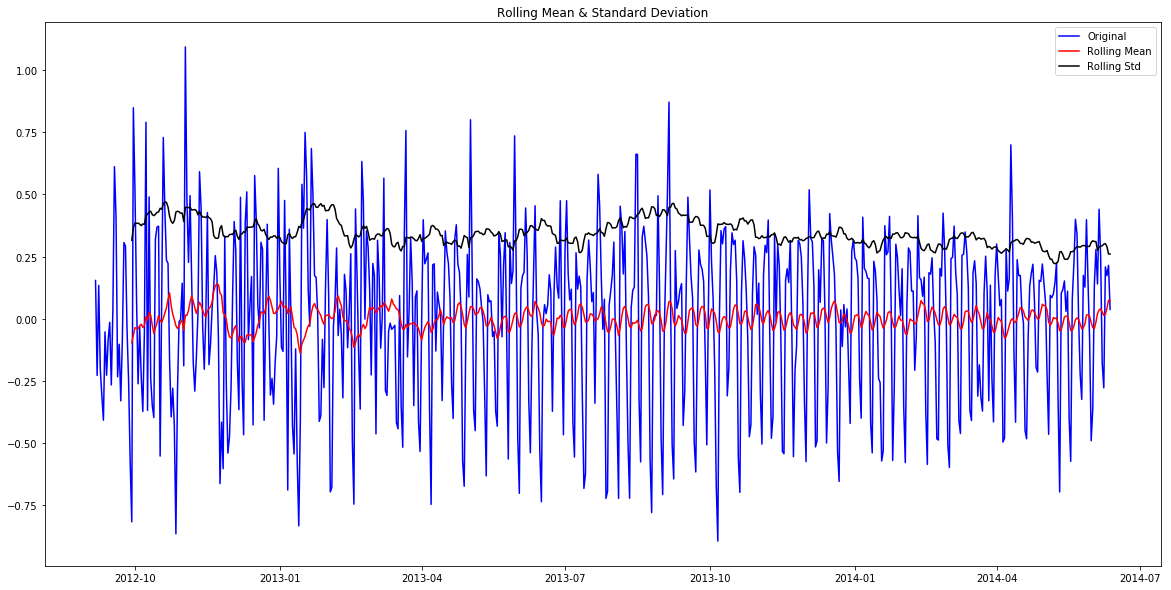

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [58]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

- It can be interpreted from the results that the residuals are stationary.

- Now we will forecast the time series using different models.

- Forecasting the time series using ARIMA
- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

#### Forecasting the time series using ARIMA:
    

- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

- To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.


ACF: is a measure of the correlation between the TimeSeries with a lagged version of itself.


PACF: measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [59]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

### ACF and PACF plot

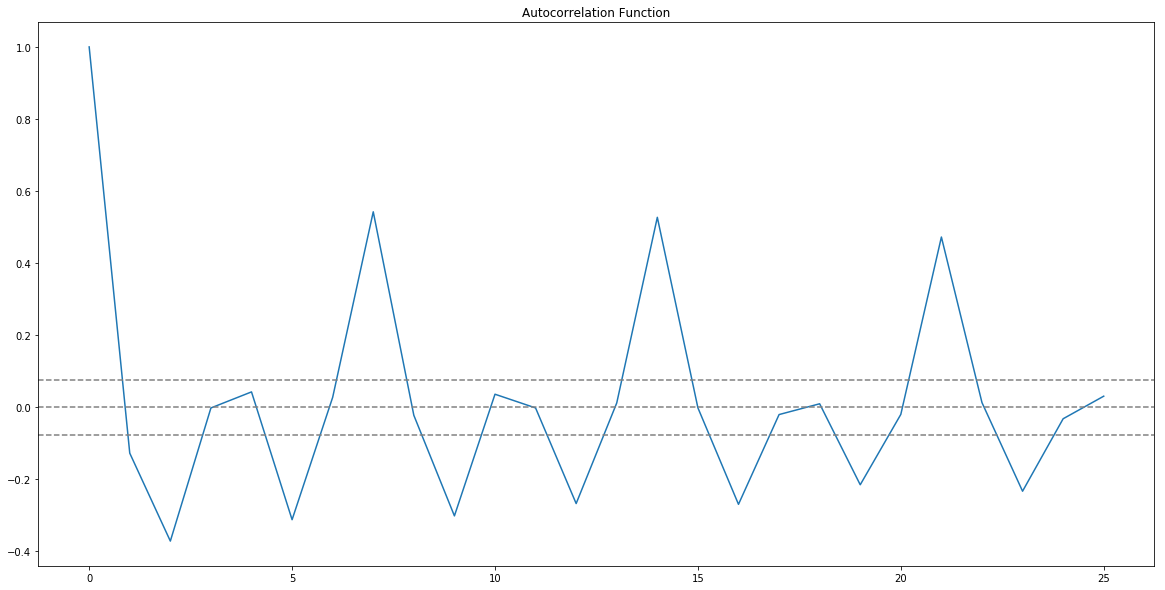

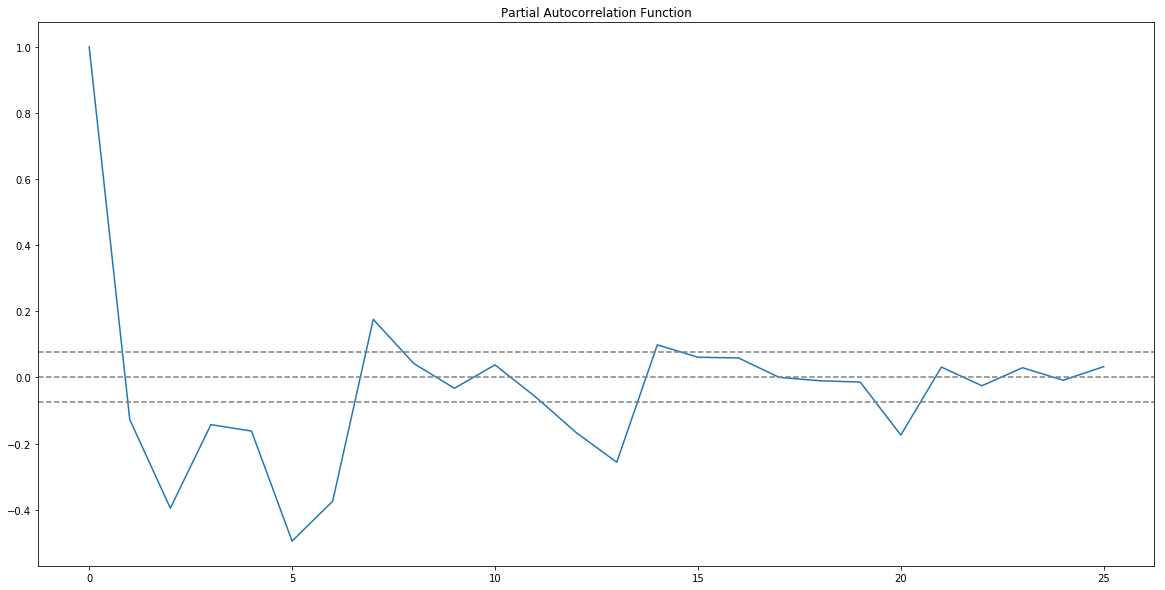

In [60]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

- Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

### AR model

- The autoregressive model specifies that the output variable depends linearly on its own previous values.

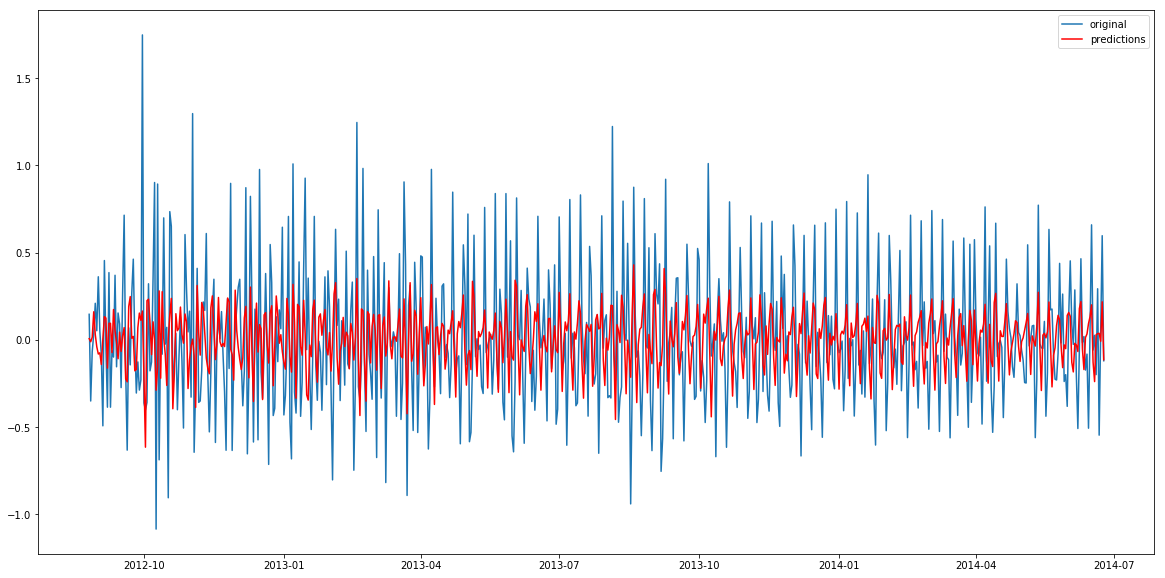

In [61]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

- Lets plot the validation curve for AR model.

- We have to change the scale of the model to the original scale.

- First step would be to store the predicted results as a separate series and observe it.

In [62]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

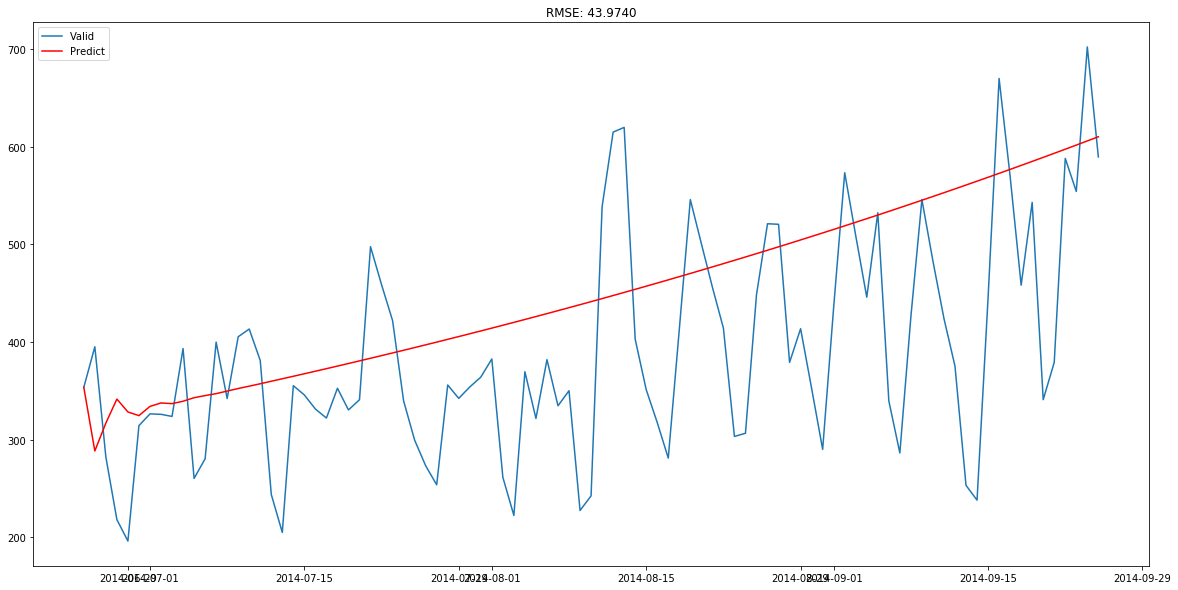

In [63]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(AR_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

- Here the red line shows the prediction for the validation set. 

### MA model

- The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

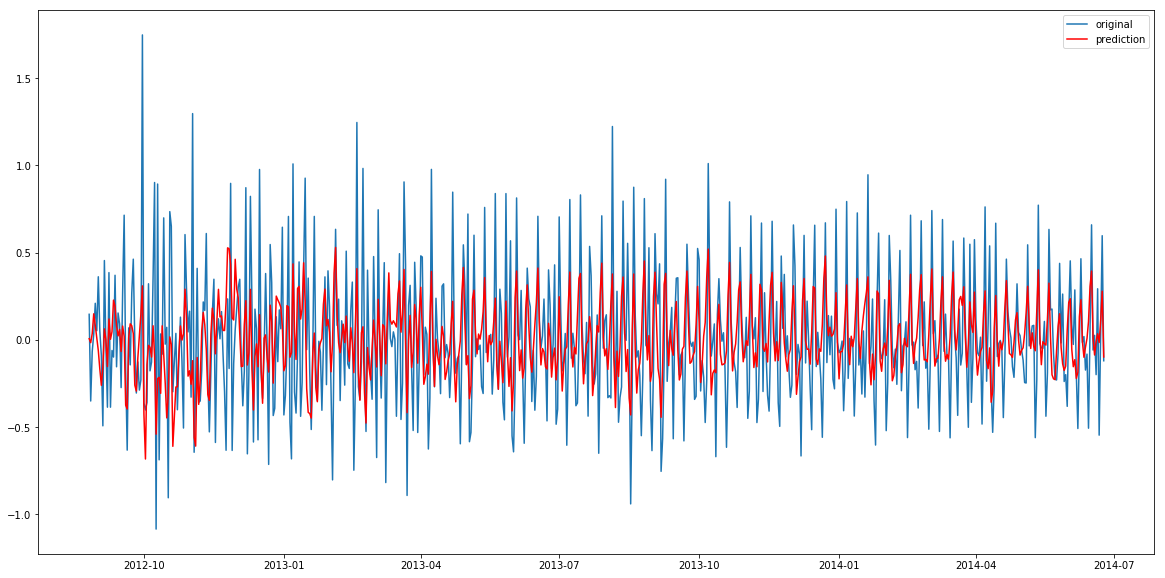

In [64]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [65]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

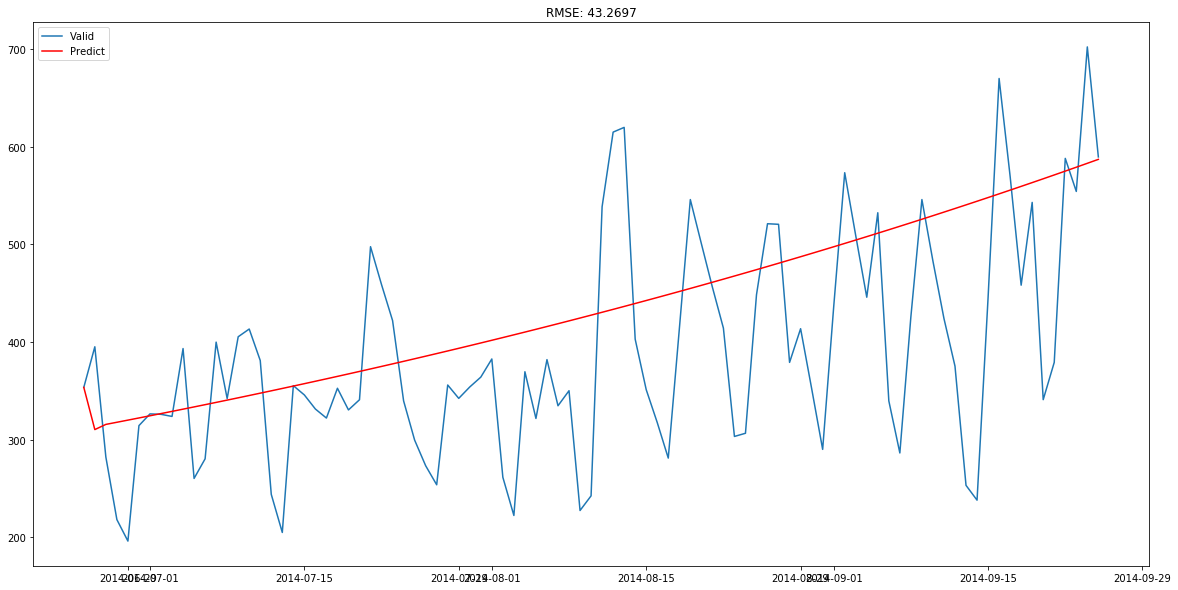

In [66]:
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

### Combined model

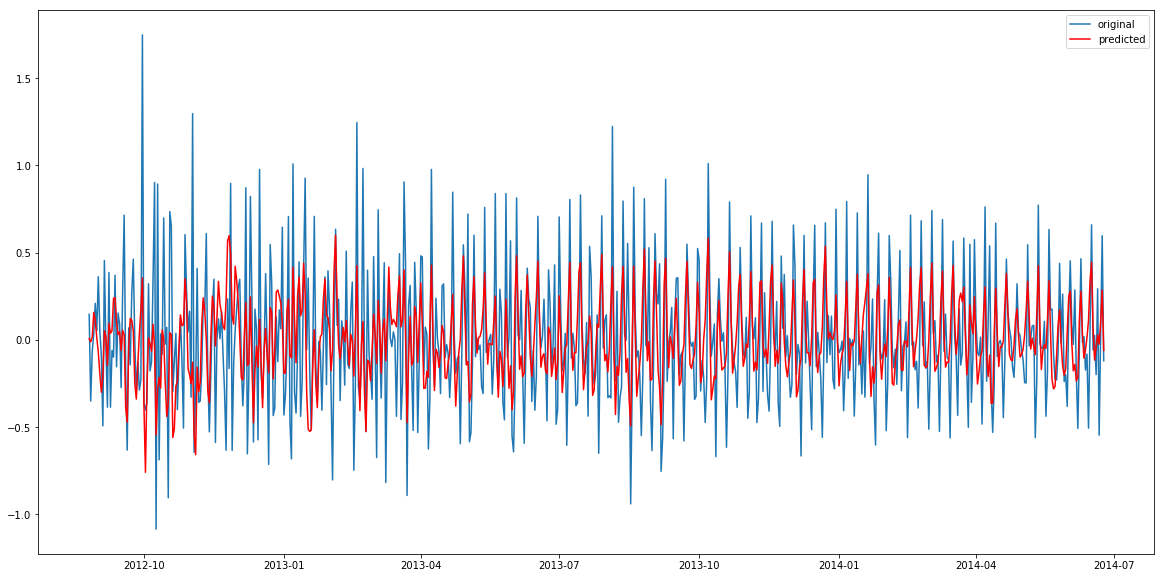

In [67]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()


- Let’s define a function which can be used to change the scale of the model to the original scale.


In [68]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [69]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

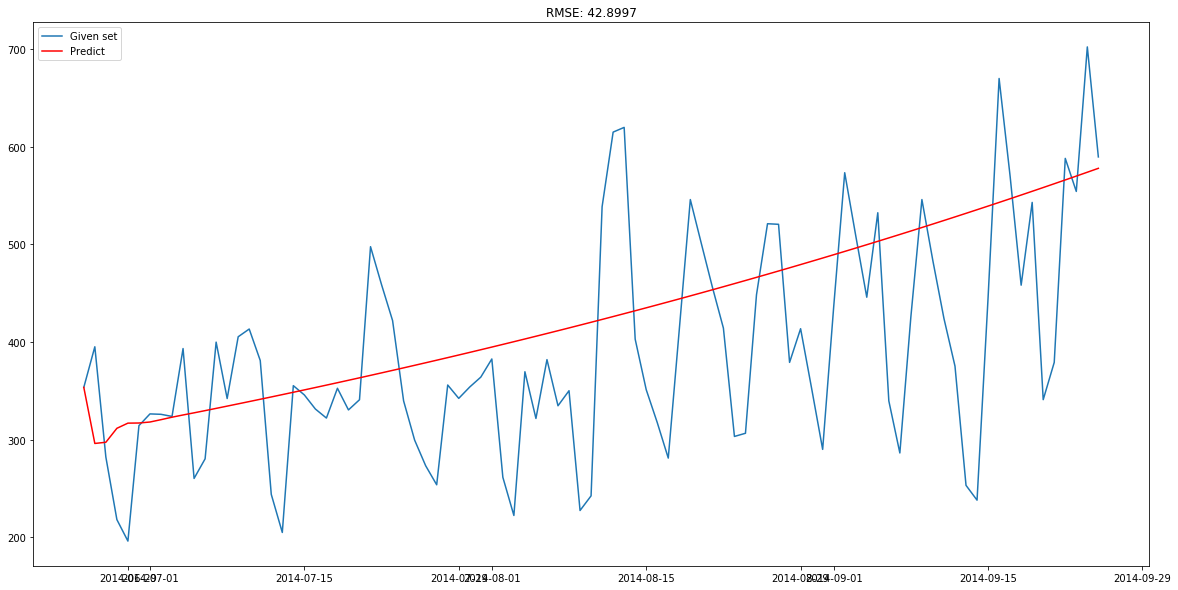

In [70]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

check_prediction_diff(ARIMA_predict_diff, valid)


### SARIMAX model on daily time series

- SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


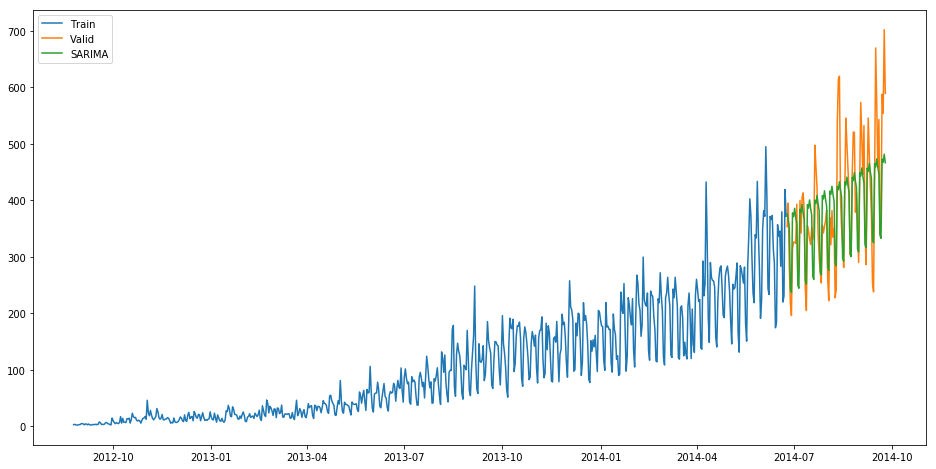

In [71]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

- Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

- Let’s check the rmse value for the validation part.

In [72]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

69.74487278382027


In [73]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

test['prediction']=predict


In [74]:
# Merge Test and test_original on day, month and year
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

# Predicting by merging merge and temp2
prediction=pd.merge(merge, temp2, on='Hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [75]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('C:\\Code Templates Python\\Time Series\\SARIMAX.csv')

### What else can be tried to improve your model further?

- You can try to make a weekly time series and make predictions for that series and then distribute those predictions into daily and then hourly predictions.

- Use combination of models(ensemble) to reduce the rmse. To read more about ensemble techniques you can refer these articles:
    

https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/

https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/
    

- To read further about the time series analysis you can refer these articles:
    
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/